In [ ]:
!pip install powerlaw

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import powerlaw
import os
import imageio.v2 as imageio
from matplotlib import colors
import sys
sys.setrecursionlimit(100000)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
class Sandpile():
  def __init__(self, latticeSize, maxSand):
    self.latticeSize = latticeSize
    self.maxSand = maxSand
    self.lattice = np.random.randint(self.maxSand, size=(self.latticeSize, self.latticeSize))
  def dropSand(self, x, y):
    global topple
    withinBounds = True

    if x < 0  or x > self.latticeSize - 1 or y < 0 or y > self.latticeSize - 1:
        withinBounds = False
        pass

    if withinBounds:
        self.lattice[x,y] = self.lattice[x,y] + 1
        if self.lattice[x,y] >= self.maxSand:
            self.lattice[x,y] = self.lattice[x, y] - 4 # reset the cell value and distribute to neighbors
            topple += 1 # count the toppling
            self.dropSand(x + 1, y)
            self.dropSand(x - 1, y)
            self.dropSand(x, y - 1)
            self.dropSand(x, y + 1)

  def evolve(self, nSteps):
    for i in range(nSteps):
      indices = []
      for x in range(self.latticeSize):
        for y in range(self.latticeSize):
          if self.lattice[x,y] >= self.maxSand:
            indices += [(x,y)]
      for x,y in indices:
        print(x,y)
        self.lattice[x,y] = self.lattice[x, y] - 4
        self.dropSand(x + 1, y)
        self.dropSand(x - 1, y)
        self.dropSand(x, y - 1)
        self.dropSand(x, y + 1)
        pile.plot()
        plt.savefig("/content/gdrive/MyDrive/5SEM/SIM/images/sandOne/img{}{}.png".format(x,y), dpi=200)
        plt.close()

  def simulate(self, nSteps):
    global topple
    topplesize = []
    for i in range(nSteps):
        topple = 0
        x = random.randint(0, self.latticeSize - 1)
        y = random.randint(0, self.latticeSize - 1)
        self.dropSand(x, y)
        topplesize.append(topple)

    return topplesize

  def plot(self):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Height of the sandpile')
    cax = ax.imshow(self.lattice, interpolation='nearest', cmap='Oranges')
    cax.set_clim(vmin = 0, vmax = 7)#vmax = 4)
    cbar = fig.colorbar(cax, ticks=[0,2,4,6], orientation='vertical')
    fig.show()

In [ ]:
def plotDist(topplesize, xmin, xmax):
    tsize = np.array(topplesize)

    fig = plt.figure(figsize=(10, 7))
    ax1 = fig.add_subplot(1, 1, 1)

    # Calculate histogram
    hist, bins, _ = plt.hist(tsize[tsize > 0], bins=250, range=(xmin, xmax), density=True, color='cornflowerblue', label="Histogram")

    # Fit power-law to raw data
    fit = powerlaw.Fit(tsize[tsize > 0], discrete=True, xmin=xmin, xmax=xmax)
    alpha = fit.power_law.alpha

    # Plot power-law fit
    fit.power_law.plot_pdf(color='crimson', linestyle='-', linewidth=1, label=r"Power-law fit")

    plt.xlabel(r"$s$", fontsize=12)
    plt.ylabel(r"$p(s)$", fontsize=12)
    plt.plot(np.NaN, np.NaN, '-', color='none', label=r"$p(s) \sim s^{-a}$")
    plt.plot(np.NaN, np.NaN, '-', color='none', label=r"$a$ = " + str(round(alpha, 2)))
    _ = plt.legend(frameon=False)
    plt.title("Normalized Avalanche Size Histogram")

    return

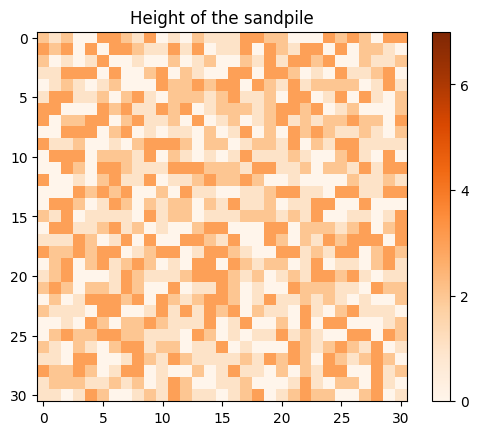

In [ ]:
nSteps = 100000 # number of iterations
latticeSize = 31 # size of matrix
maxSand = 4 # critical level for toppling to occur

global topple
topple = 0
topplesize = []

pile = Sandpile(latticeSize, maxSand)
pile.plot()

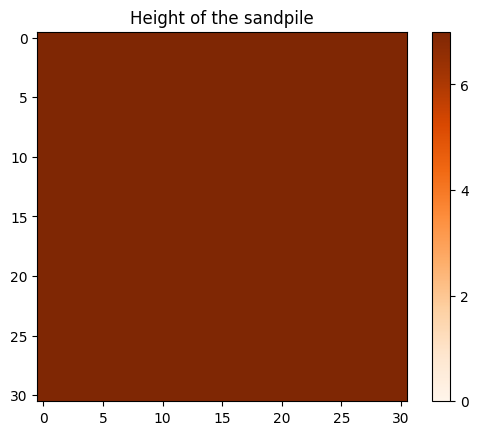

In [ ]:
nSteps = 1500 # number of iterations
latticeSize = 5 # size of matrix
maxSand = 4 # critical level for toppling to occur

global topple
topple = 0
topplesize = []

pile = Sandpile(latticeSize, maxSand)
pile.lattice = 7 * np.ones((latticeSize, latticeSize))
pile.plot()

In [ ]:
png_dir = '/content/gdrive/MyDrive/5SEM/SIM/images/sandOne/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        #os.remove(file_path)


imageio.mimsave('/content/gdrive/MyDrive/5SEM/SIM/images/sandOne/movie.gif', images, duration=0.01)

In [ ]:
topplesize = pile.simulate(nSteps)

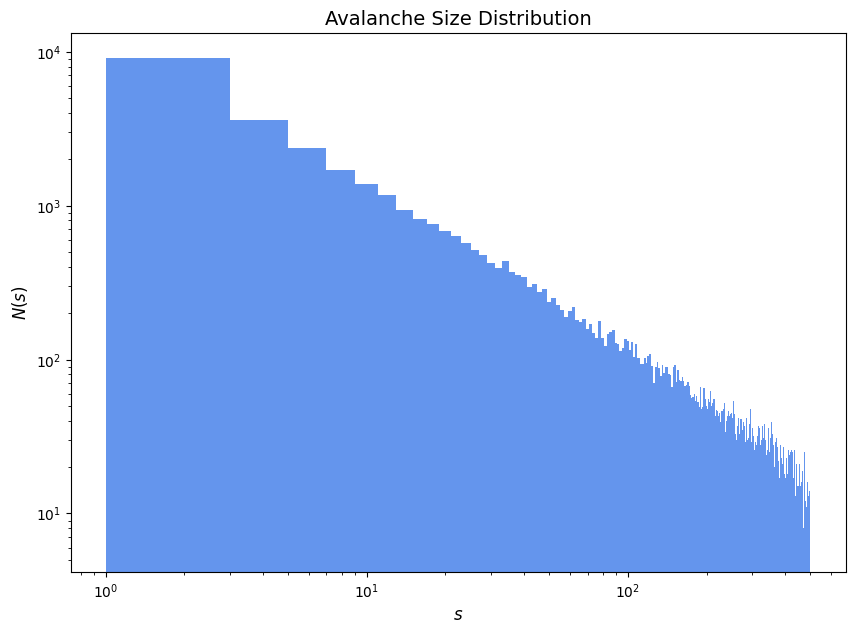

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(topplesize, log=True, bins=250, range=(1, 500), color='cornflowerblue')
plt.xscale('log')
plt.title("Avalanche Size Distribution", fontsize=14)
plt.xlabel(r"$s$", fontsize=12)
plt.ylabel(r"$N(s)$", fontsize=12)
plt.show()

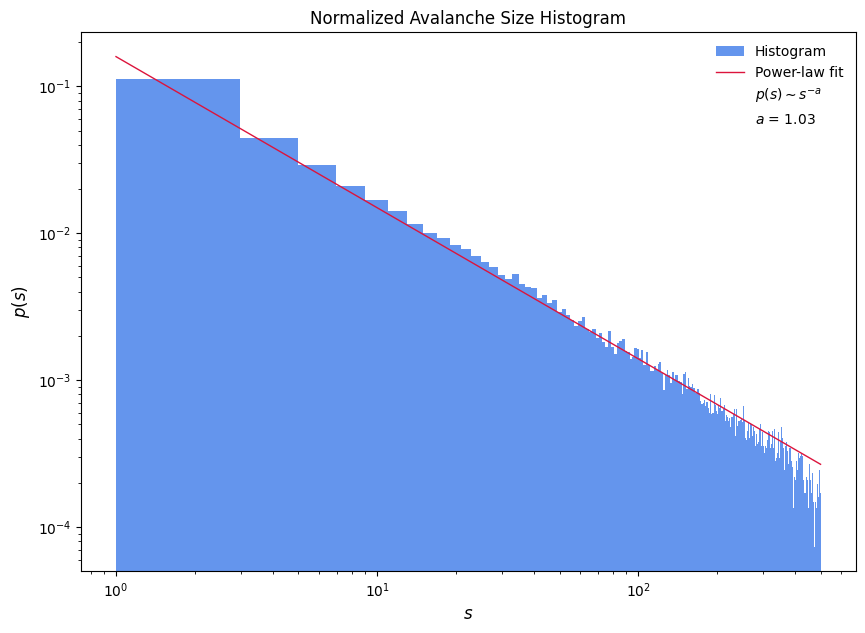

In [ ]:
plotDist(topplesize, xmin=1, xmax=500)

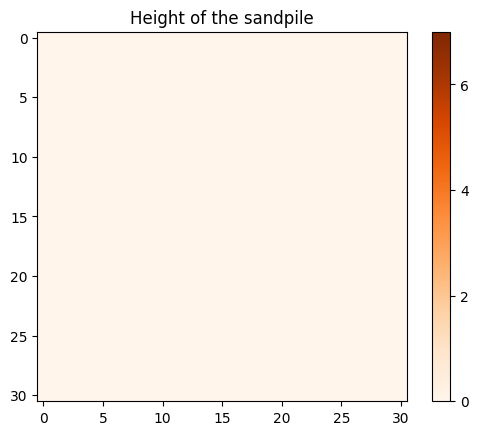

In [ ]:
unsteadySteps = 1500
pile = Sandpile(latticeSize, maxSand)
pile.lattice = np.zeros((latticeSize, latticeSize))
pile.plot()

In [ ]:
x = pile.latticeSize // 2
y = pile.latticeSize // 2
for i in range(unsteadySteps):
  pile.dropSand(x, y)
  pile.plot()
  plt.savefig("/content/gdrive/MyDrive/5SEM/SIM/images/sand/img{}.png".format(i), dpi=200)
  plt.close()

In [ ]:
png_dir = '/content/gdrive/MyDrive/5SEM/SIM/images/sand/'
images = []
for file_name in sorted(os.listdir(png_dir)[:1000]):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        #os.remove(file_path)


imageio.mimsave('/content/gdrive/MyDrive/5SEM/SIM/images/sand/movie.gif', images, duration=0.01)

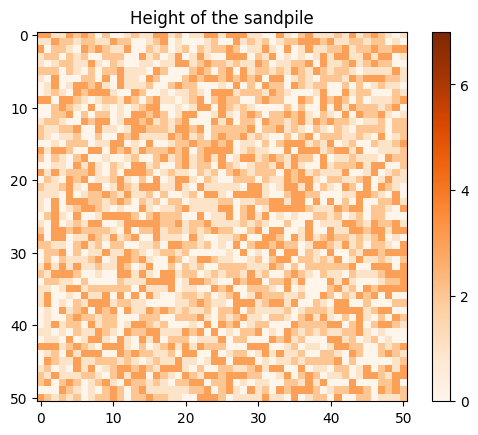

In [ ]:
latticeSize = 51 # size of matrix
maxSand = 4 # critical level for toppling to occur


pile = Sandpile(latticeSize, maxSand)
pile.plot()

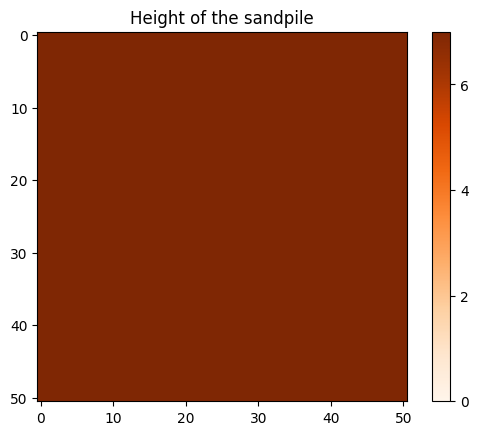

In [ ]:
pile.lattice = 7 * np.ones((latticeSize, latticeSize))
pile.plot()

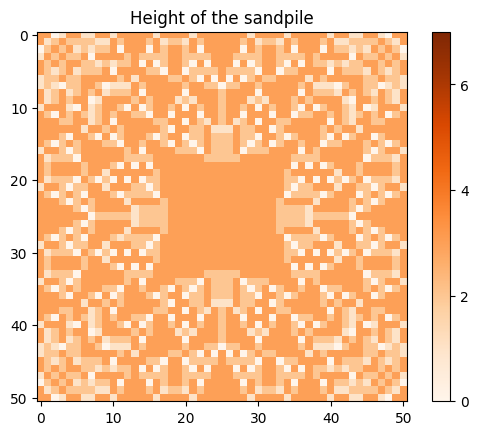

In [ ]:
topplesize = pile.simulate(1)
pile.plot()

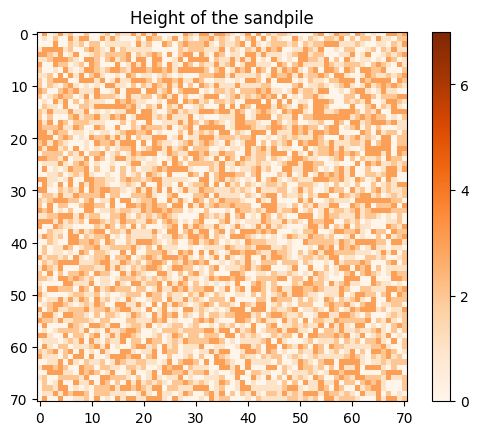

In [ ]:
latticeSize = 71 # size of matrix
maxSand = 4 # critical level for toppling to occur


pile = Sandpile(latticeSize, maxSand)
pile.plot()

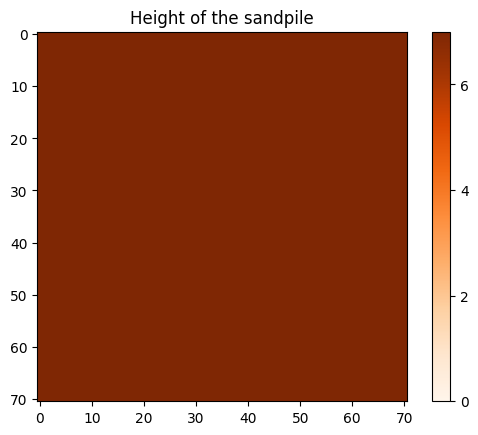

In [ ]:
pile.lattice = 7 * np.ones((latticeSize, latticeSize))
pile.plot()

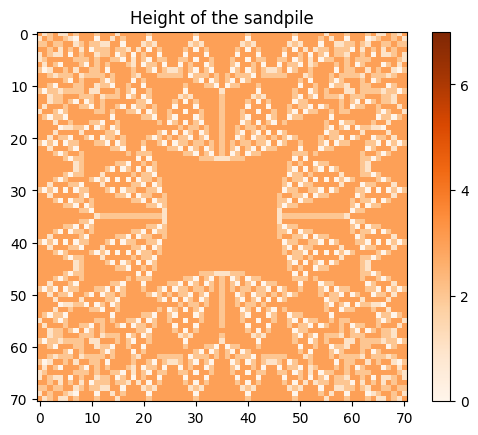

In [ ]:
topplesize = pile.simulate(1)
pile.plot()

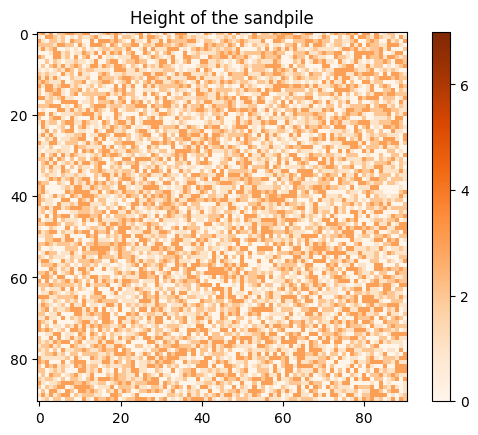

In [ ]:
latticeSize = 91 # size of matrix
maxSand = 4 # critical level for toppling to occur


pile = Sandpile(latticeSize, maxSand)
pile.plot()
pile.lattice = 7 * np.ones((latticeSize, latticeSize))

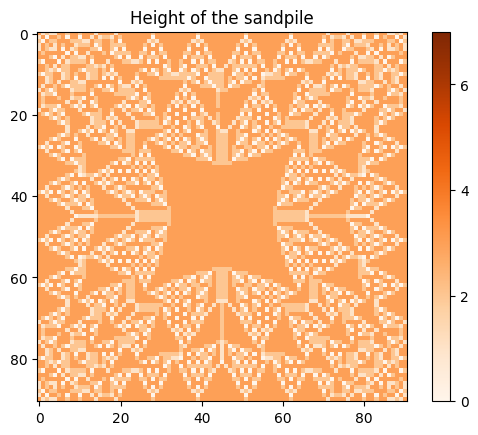

In [ ]:
topplesize = pile.simulate(1)
pile.plot()

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2

zc= 3
N = 30

area = [[7 for _ in range (N)] for __ in range (N)]

run = True
t = 0

prev = 0

n_sand = []
ts=[]

counter = 0
filenames = []


t = 0

while run:
    t+=1
    critical = True

    for y in range (len(area)):
        for x in range (len(area)):
            if area[y][x] > zc:
                area[y][x] -= 4
                if y-1 >= 0:
                    area[y-1][x] += 1

                if y+1 <= len(area)-1:
                    area[y+1][x] += 1

                if x-1 >= 0:
                    area[y][x-1] += 1

                if x+1 <= len(area)-1:
                    area[y][x+1] += 1


                critical = False

    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.set_title('Height of the Sandpile')

    cax = ax.imshow(area, interpolation='nearest',  cmap='Oranges')
    cax.set_clim(vmin=0, vmax=8)
    cbar = fig.colorbar(cax, ticks=[0,3, 5, 8], orientation='vertical')

    filename = "/content/gdrive/MyDrive/5SEM/SIM/images/sand30/" + str('%03d' % t) + '.png'
    filenames.append(filename)
    plt.savefig(filename, dpi=100)
    plt.close()

    actual = 0
    if critical:
        run = False

with imageio.get_writer(f'CriticalMovieForSize{N}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

In [ ]:
import os
png_dir = '/content/gdrive/MyDrive/5SEM/SIM/images/sand30/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        #os.remove(file_path)


imageio.mimsave('/content/gdrive/MyDrive/5SEM/SIM/images/sand30/movie30.gif', images, duration=0.01)

<ipython-input-6-2630d6fb181f>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2

zc= 3
N = 31

area = [[0 for _ in range (N)] for __ in range (N)]

run = True
t = 0

prev = 0

n_sand = []
ts=[]

counter = 0
filenames = []

for t in range(5000):
    x = 15
    y = 15
    area[y][x] +=1

    runz = True

    while runz:
        critical = True

        for y in range (len(area)):
            for x in range (len(area)):
                if area[y][x] > zc:
                    area[y][x] -= 4
                    if y-1 >= 0:
                        area[y-1][x] += 1

                    if y+1 <= len(area)-1:
                        area[y+1][x] += 1

                    if x-1 >= 0:
                        area[y][x-1] += 1

                    if x+1 <= len(area)-1:
                        area[y][x+1] += 1

                    #print (f"{t}: lawina")

                    critical = False
        actual = 0

        if critical:
            runz = False

    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.set_title('Height of the Sandpile')

    cax = ax.imshow(area, interpolation='nearest',  cmap='Oranges')
    cax.set_clim(vmin=0, vmax=8)
    cbar = fig.colorbar(cax, ticks=[0,3, 5, 8], orientation='vertical')

    filename = "/content/gdrive/MyDrive/5SEM/SIM/images/sandOneDrop/" + str('%03d' % t) + '.png'
    filenames.append(filename)
    plt.savefig(filename, dpi=100)
    plt.close()

In [ ]:
import os
import imageio.v2 as imageio
png_dir = '/content/gdrive/MyDrive/5SEM/SIM/images/sandOneDrop/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        #os.remove(file_path)


imageio.mimsave('/content/gdrive/MyDrive/5SEM/SIM/images/sandOneDrop/sandOneDrop.gif', images, duration=0.01)